### 1.Data Cleaning And Preparation

##### a.Load the dataset into a Pandas DataFrame and display the first five rows.

In [3]:
import pandas as pd

data = pd.read_csv('ecommerce_data.csv')

print(data.head())

   Order ID     Product     Category  Quantity Ordered  Price Each  \
0         1      Laptop  Electronics                 1      834.18   
1         2       Shoes      Apparel                 4      903.27   
2         3      Laptop  Electronics                 2      365.51   
3         4      Pillow   Home Goods                 5      169.17   
4         5  Smartphone  Electronics                 5      498.51   

            Order Date      City  Customer ID  
0  2024-07-28 15:26:51   Chicago         4676  
1  2024-01-26 13:10:16  New York         1891  
2  2024-12-02 20:36:02   Chicago         4254  
3  2024-04-27 02:18:27   Houston         2859  
4  2024-03-31 06:02:42   Phoenix         5713  


##### b.Check for missing or null values in the dataset. Handle these appropriately. 

In [5]:
print(data.isnull().sum())

Order ID            0
Product             0
Category            0
Quantity Ordered    0
Price Each          0
Order Date          0
City                0
Customer ID         0
dtype: int64


In [6]:
data_cleaned = data.dropna()
print(f"Number of rows after cleaning: {data_cleaned.shape[0]}")

Number of rows after cleaning: 1000


##### c.Convert columns to appropriate data types (e.g., Order Date to datetime).

In [8]:
print(data_cleaned.dtypes)

Order ID              int64
Product              object
Category             object
Quantity Ordered      int64
Price Each          float64
Order Date           object
City                 object
Customer ID           int64
dtype: object


In [9]:
data_cleaned['Order Date'] = pd.to_datetime(data_cleaned['Order Date'])

In [10]:
print(data_cleaned.dtypes)

Order ID                     int64
Product                     object
Category                    object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
City                        object
Customer ID                  int64
dtype: object


##### d.Create a new column, Total Price, which is the product of Quantity Ordered and Price Each

In [12]:
data_cleaned['Total Price'] = data_cleaned['Quantity Ordered'] * data_cleaned['Price Each']

print(data_cleaned.head())

   Order ID     Product     Category  Quantity Ordered  Price Each  \
0         1      Laptop  Electronics                 1      834.18   
1         2       Shoes      Apparel                 4      903.27   
2         3      Laptop  Electronics                 2      365.51   
3         4      Pillow   Home Goods                 5      169.17   
4         5  Smartphone  Electronics                 5      498.51   

           Order Date      City  Customer ID  Total Price  
0 2024-07-28 15:26:51   Chicago         4676       834.18  
1 2024-01-26 13:10:16  New York         1891      3613.08  
2 2024-12-02 20:36:02   Chicago         4254       731.02  
3 2024-04-27 02:18:27   Houston         2859       845.85  
4 2024-03-31 06:02:42   Phoenix         5713      2492.55  


#### 2. Sales Analysis

In [14]:
Revenue = data_cleaned['Total Price'].sum()
print(Revenue)

1578547.12


##### a.Calculate the total revenue generated by the city.

In [16]:
data_cleaned['Revenue'] = data_cleaned['Quantity Ordered'] * data_cleaned['Price Each']
Revenue = data_cleaned['Revenue']
revenue_by_city = data_cleaned.groupby('City')['Revenue'].sum().reset_index()
    
print(revenue_by_city)

          City    Revenue
0      Chicago  188616.21
1       Dallas  181207.13
2      Houston  206380.13
3  Los Angeles  214139.13
4     New York  199971.19
5      Phoenix  200823.90
6  San Antonio  183016.12
7    San Diego  204393.31


##### b.Identify the top 5 products based on total sales revenue.

In [18]:
revenue_by_products = data_cleaned.groupby('Product')['Revenue'].sum().reset_index()
top_5_products = revenue_by_products.sort_values(by='Revenue', ascending=False).head()
print(top_5_products)


       Product    Revenue
12  Smartphone  126562.51
11       Shoes  115038.76
7        Jeans  114699.49
9       Laptop  112218.17
10      Pillow  111572.81


##### c. Find the month with the highest sales and plot a graph to show monthly revenue.



In [20]:
data_cleaned['Month'] = data_cleaned['Order Date'].dt.month
print(data_cleaned['Month'])


0       7
1       1
2      12
3       4
4       3
       ..
995     6
996     7
997     6
998    11
999     4
Name: Month, Length: 1000, dtype: int32


In [21]:
revenue_by_month = data_cleaned.groupby('Month')['Revenue'].sum().reset_index()
top_month = revenue_by_month.sort_values(by='Revenue', ascending=False).head(1)
print(top_month)

   Month   Revenue
6      7  174472.2


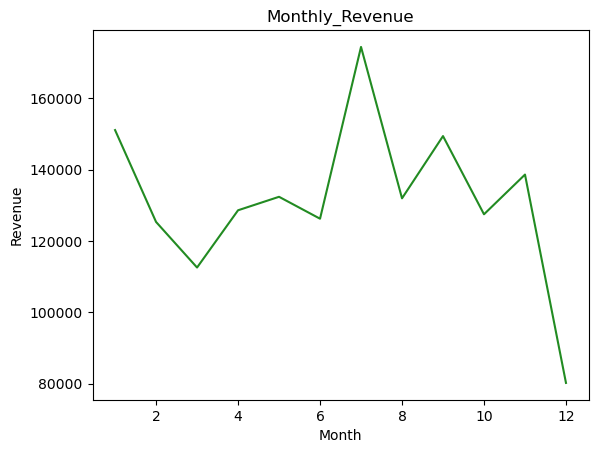

In [71]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(revenue_by_month['Month'],revenue_by_month['Revenue'], color='forestgreen')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly_Revenue')
plt.show()


### 3.Category and City Analysis
#### a.Group the data by Category and calculate the total revenue for each category.

In [24]:
group_by_category = data_cleaned.groupby('Category')
revenue_by_category = group_by_category['Revenue'].sum().reset_index()
print(revenue_by_category)


      Category    Revenue
0      Apparel  546446.34
1  Electronics  523641.32
2   Home Goods  508459.46


#### b.Find the city with the highest number of orders.

In [26]:
group_by_city = data_cleaned.groupby('City')['Quantity Ordered'].sum().reset_index()
highest_orders_by_city = group_by_city.sort_values(by='Quantity Ordered', ascending=False).head()
print(highest_orders_by_city)
print("\n--------------------")
print("City with the highest number of orders is:")
print( highest_orders_by_city.head(1))

          City  Quantity Ordered
2      Houston               401
5      Phoenix               400
3  Los Angeles               398
7    San Diego               384
4     New York               376

--------------------
City with the highest number of orders is:
      City  Quantity Ordered
2  Houston               401


#### c.Plot a bar chart to visualize revenue across different cities.

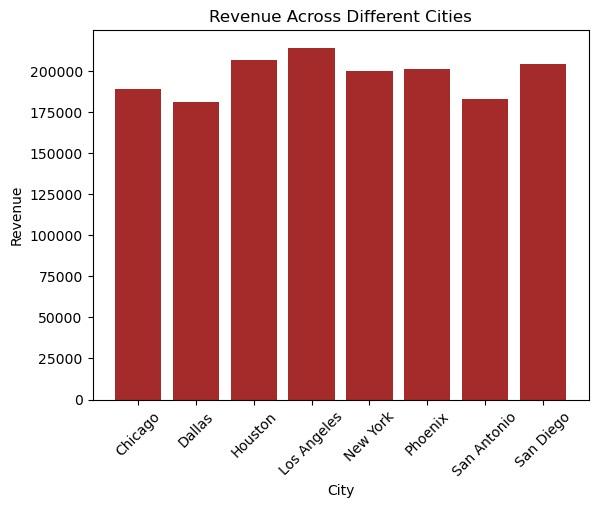

In [69]:
plt.bar(revenue_by_city['City'], revenue_by_city['Revenue'], color='brown')
plt.title("Revenue Across Different Cities")
plt.xlabel('City')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

### 4.Customer Behavior Analysis
#### a.Identify the customer who spent the most money and calculate their total spending.

In [30]:
revenue_by_customer = data_cleaned.groupby('Customer ID')['Revenue'].sum().reset_index()
top_customer = revenue_by_customer.sort_values(by='Revenue', ascending=False).head()
print(top_customer)
print("\n----------------")
print("Customer who spent most money is:")
print(top_customer.head(1))

     Customer ID  Revenue
384         4626  8100.03
743         7838  6739.26
742         7834  6605.41
920         9758  6595.04
676         7196  6412.63

----------------
Customer who spent most money is:
     Customer ID  Revenue
384         4626  8100.03


#### b.Find the average order value (AOV) for all customers.

In [32]:
Total_Revenue = data_cleaned['Revenue'].sum()
Total_Orders = data_cleaned['Quantity Ordered'].sum()
average_order_value = Total_Revenue/Total_Orders
print("Total Revenue :", Total_Revenue)
print("Total Orders :", Total_Orders)
print("Average Order Value =",round(average_order_value, 2))

Total Revenue : 1578547.12
Total Orders : 3042
Average Order Value = 518.92


#### c.Determine the product most frequently purchased by customers.

In [34]:
product_purchase = data_cleaned.groupby('Product')['Quantity Ordered'].sum().reset_index()
frequently_purchased_product = product_purchase.sort_values(by='Quantity Ordered', ascending=False).head(1)
print("The Product most frequently purchased by customer is:")
print(frequently_purchased_product)

The Product most frequently purchased by customer is:
       Product  Quantity Ordered
12  Smartphone               247


### 5.Bonus (Optional)
#### a.Extract the hour from the Order Date column and determine the hour with the highest sales.

In [36]:
data_cleaned['Hour'] = data_cleaned['Order Date'].dt.hour
highest_sales_hour = data_cleaned.groupby('Hour')['Revenue'].sum().reset_index()
hour_with_highest_sales = highest_sales_hour.sort_values(by='Revenue', ascending=False).head(1)
print(hour_with_highest_sales)

    Hour  Revenue
15    15  99815.5


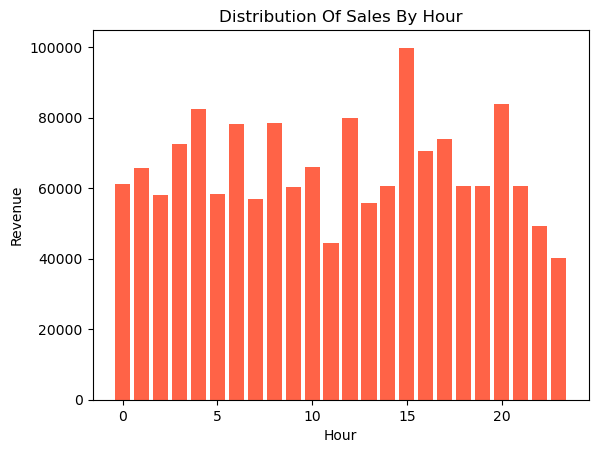

In [65]:
plt.bar(highest_sales_hour['Hour'], highest_sales_hour['Revenue'], color='tomato')
plt.title("Distribution Of Sales By Hour")
plt.xlabel('Hour')
plt.ylabel('Revenue')
plt.show()